In [1]:
import tensorflow
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.layers import TimeDistributed
from keras.layers import SimpleRNN

Using TensorFlow backend.


In [2]:
f50 = np.load("f50.npy")
f100 = np.load("f100.npy")
f150 = np.load("f150.npy")
f200 = np.load("f200.npy")
f50_100 = np.load("f50_100.npy")

In [3]:
f50_100_target = []
for i in range(100):
    zero_um = (0,1)
    f50_100_target.append(zero_um)

for i in range(100):
    um_zero = (1,0)
    f50_100_target.append(um_zero)

In [4]:
# f50_100_target

In [5]:
X = np.reshape(f50_100, (200, 1000, 1))
y = np.array(f50_100_target)

In [6]:
# y

In [31]:
'''
import math
n_input_layer = 1000
n_output_layer = 1
n_hidden_layer = round(math.sqrt((n_input_layer*n_output_layer)))
print("nro de neurônios na hidden layer:", n_hidden_layer)
'''
n_hidden_layer = 32

In [8]:
from keras.callbacks import EarlyStopping
from matplotlib import pyplot

In [9]:
'''model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(1000,1), 
                    kernel_initializer='random_normal'))
model.add(Dense(2, activation='sigmoid'))
# model.compile(loss = 'mse', optimizer = 'rmsprop')
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()'''

"model=Sequential()\nmodel.add(SimpleRNN(n_hidden_layer, \n                    input_shape=(1000,1), \n                    kernel_initializer='random_normal'))\nmodel.add(Dense(2, activation='sigmoid'))\n# model.compile(loss = 'mse', optimizer = 'rmsprop')\nmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])\nmodel.summary()"

In [10]:
model=Sequential()
model.add(SimpleRNN(n_hidden_layer, 
                    input_shape=(None,1), 
                    kernel_initializer='random_normal',
                    stateful = True,
                    batch_size = 1
                    ))
model.add(Dense(2, activation='softmax'))
model.compile(loss = 'mse', optimizer = 'adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (1, 32)                   1088      
_________________________________________________________________
dense_1 (Dense)              (1, 2)                    66        
Total params: 1,154
Trainable params: 1,154
Non-trainable params: 0
_________________________________________________________________


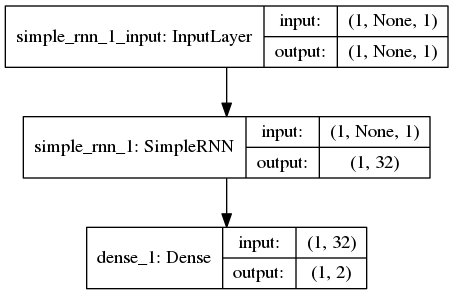

In [11]:
from keras.utils.vis_utils import plot_model
import graphviz
from interface import implements, Interface
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [12]:
# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

In [14]:
'''history = model.fit(X, y, epochs = 20, batch_size = 32, callbacks=[es])'''
history = model.fit(X, y, epochs = 5, batch_size = 1)

Epoch 1/5
200/200 [==============================] - 21s 105ms/step - loss: 0.0129
Epoch 2/5
200/200 [==============================] - 21s 104ms/step - loss: 1.5867e-04
Epoch 3/5
200/200 [==============================] - 21s 103ms/step - loss: 0.0050
Epoch 4/5
200/200 [==============================] - 20s 102ms/step - loss: 5.7639e-05
Epoch 5/5
200/200 [==============================] - 20s 102ms/step - loss: 0.0101


In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['loss'])


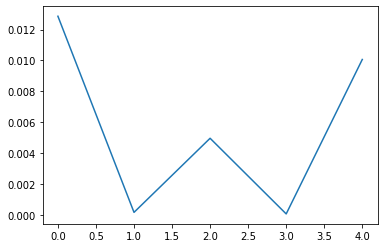

In [17]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['loss'], label='train')
# plt.plot(history.history['accuracy'], label='test')

In [18]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [19]:
pi = 3.1415
N = 1000
t = np.arange(0,N)
f = 100

In [20]:
qtd_amostras = 20

test = []
test_target = []

f = 50
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1)) 
    test_target.append(zero_um)
    test.append(x)
    
f = 100
for onda_da_frequencia in range(qtd_amostras):
    x=np.sin(2*pi*f*t+np.random.rand(1))    
    test_target.append(um_zero)
    test.append(x)
    
test = np.reshape(test, (40, 1000, 1))

In [23]:
predictions = model.predict(test, batch_size=1)
for i in range(len(test)):
    print(predictions[i], 'expected', test_target[i])

[0.12701792 0.8729821 ] expected (0, 1)
[0.12124966 0.8787504 ] expected (0, 1)
[0.04824977 0.9517503 ] expected (0, 1)
[0.03971175 0.9602883 ] expected (0, 1)
[0.04037165 0.9596284 ] expected (0, 1)
[0.04925147 0.9507485 ] expected (0, 1)
[0.0591395 0.9408605] expected (0, 1)
[0.03530094 0.96469903] expected (0, 1)
[0.05447135 0.9455286 ] expected (0, 1)
[0.0330437 0.9669563] expected (0, 1)
[0.10101957 0.8989804 ] expected (0, 1)
[0.06983759 0.9301624 ] expected (0, 1)
[0.0772824 0.9227176] expected (0, 1)
[0.12397861 0.8760214 ] expected (0, 1)
[0.04025654 0.95974344] expected (0, 1)
[0.06126749 0.93873256] expected (0, 1)
[0.03127609 0.96872395] expected (0, 1)
[0.04453847 0.9554615 ] expected (0, 1)
[0.04418538 0.95581466] expected (0, 1)
[0.03492628 0.9650737 ] expected (0, 1)
[0.8875808  0.11241919] expected (1, 0)
[0.934313   0.06568693] expected (1, 0)
[0.83995986 0.16004013] expected (1, 0)
[0.9263738 0.0736262] expected (1, 0)
[0.9025037  0.09749625] expected (1, 0)
[0.93376

In [24]:
test_target_arr = np.array(test_target)

In [25]:
predictions_rounded = np.matrix.round(predictions)

In [26]:
y_test_classes = test_target_arr.argmax(1)
y_pred_classes = predictions_rounded.argmax(1)

In [27]:
y_pred_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
y_test_classes

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_pred_classes, y_test_classes)

In [30]:
print(matrix)

[[20  0]
 [ 0 20]]
